# Introdução à Estatística (Case Prático)
***

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" height="40px" style="position: absolute; top: 12px; right: 20px;" />

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando as bibliotecas e lendo o dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()
#pio.templates.default = 'plotly.dark'

In [3]:
df = pd.read_csv("PNAD - 2015.csv")
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [5]:
df.shape

(76840, 7)

In [6]:
df.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [7]:
df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

## <font color=green>1. Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [320]:
df['Anos de Estudo']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Anos de Estudo, Length: 76840, dtype: int64

**Não existe variávei qualitativas ordinais**

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [8]:
df.UF

0        11
1        11
2        11
3        11
4        11
         ..
76835    53
76836    53
76837    53
76838    53
76839    53
Name: UF, Length: 76840, dtype: int64

In [9]:
df.Sexo

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: Sexo, Length: 76840, dtype: int64

In [10]:
df.Cor

0        8
1        2
2        8
3        2
4        8
        ..
76835    2
76836    4
76837    8
76838    8
76839    8
Name: Cor, Length: 76840, dtype: int64

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [321]:
df.Idade

0        23
1        23
2        35
3        46
4        47
         ..
76835    46
76836    30
76837    32
76838    57
76839    38
Name: Idade, Length: 76840, dtype: int64

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [12]:
df.Renda
df.Altura

0        1.603808
1        1.739790
2        1.760444
3        1.783158
4        1.690631
           ...   
76835    1.687030
76836    1.792934
76837    1.830587
76838    1.726344
76839    1.658305
Name: Altura, Length: 76840, dtype: float64

## <font color=green>2. Distribuição de frequências</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

In [326]:
abs_freq = df.Sexo.value_counts()
percent_freq = df.Sexo.value_counts(normalize=True) * 100
freq_sexo = pd.DataFrame({'Freq_abs': abs_freq,'Freq_percent':percent_freq})\
            .rename({0:'Masculino',1:'Feminino'})
freq_sexo

,Freq_abs,Freq_percent
Masculino,53250,69.299844
Feminino,23590,30.700156


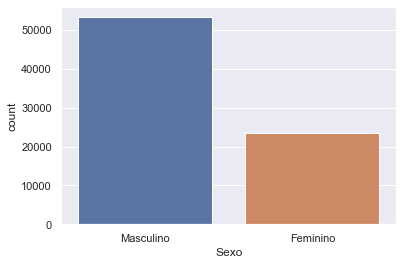

In [330]:
sns.countplot(data=df, x='Sexo').set_xticklabels(['Masculino','Feminino']);

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor

In [334]:
sexo_cor_xdf = pd.crosstab(df.Sexo, df.Cor)
sexo_cor_xdf.rename({0:'Indígena',
                    2:'Branca',
                    4:'Preta',
                    6:'Amarela',
                    8:'Parda'}, axis=1)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


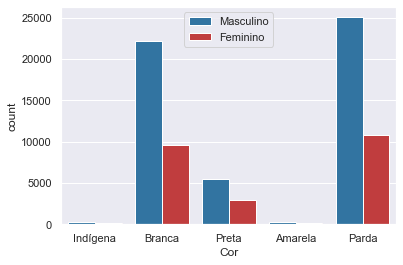

In [338]:
sns.countplot(data=df, x='Cor', hue='Sexo', palette=['tab:blue','tab:red'], )\
    .set_xticklabels(['Indígena','Branca','Preta','Amarela','Parda']);
plt.legend(labels=['Masculino','Feminino']);

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


#### 1. Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [340]:
sm = 788
faixa_salarial = pd.cut(x=df['Renda'], 
                        bins=[min(df.Renda),2*sm,4*sm,10*sm,20*sm,max(df.Renda)],
                        labels=['E','D','C','B','A'],
                        include_lowest=True)
faixa_salarial

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [341]:
faixa_salarial.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [112]:
faixa_salarial = faixa_salarial.map(
                {key:value for key, value in zip(faixa_salarial.cat.categories,['E','D','C','B','A'])},
                na_action='ignore')
faixa_salarial

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

#### 2. Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [343]:
fi = faixa_salarial.value_counts()
fi

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [344]:
fp = faixa_salarial.value_counts(True)*100
fp

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [360]:
renda_freq = pd.DataFrame({'Freq_abs': fi,'Freq_percent':fp})
renda_freq

,Freq_abs,Freq_percent
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<AxesSubplot:>

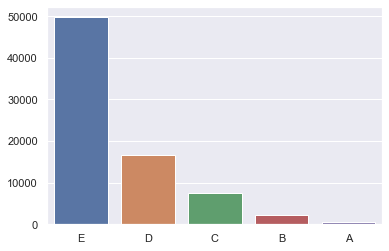

In [356]:
sns.barplot(x=fi.index, y=fi.values)

<AxesSubplot:ylabel='Probability'>

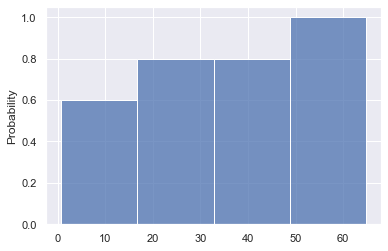

In [366]:
sns.histplot(x=fp.values, cumulative=True, stat='probability')

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

#### 1. Definindo o número de classes e criando o dataframe com as classes

#### Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [119]:
k = 1 + (10/3) * np.log10(df.shape[0])
k

17.285291187298853

In [130]:
df.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

<AxesSubplot:ylabel='Renda'>

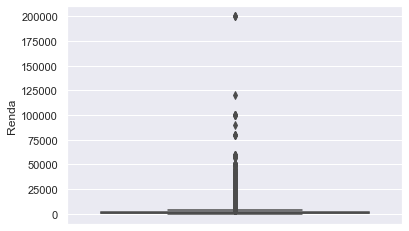

In [131]:
sns.boxplot(y=df.Renda)

A distribuicao da renda apreenta possíveis outliers, portanto faremos outra análise removendo este elementos.

In [133]:
q1, q3 = df.Renda.quantile(0.25), df.Renda.quantile(0.75)
iqr =  q3 - q1 
limite_superior = min(q3 + 1.5 * iqr, df.Renda.max())
limite_superior

3818.0

In [143]:
faixa_salarial = pd.cut(x=df['Renda'], bins=int(k))
faixa_salarial_clean = pd.cut(x=df[df['Renda']<= limite_superior]['Renda'], bins=int(k))
faixa_salarial.shape[0] , faixa_salarial_clean.shape[0]

(76840, 68227)

In [379]:
rendacut = pd.qcut(x=df['Renda'], q=4)

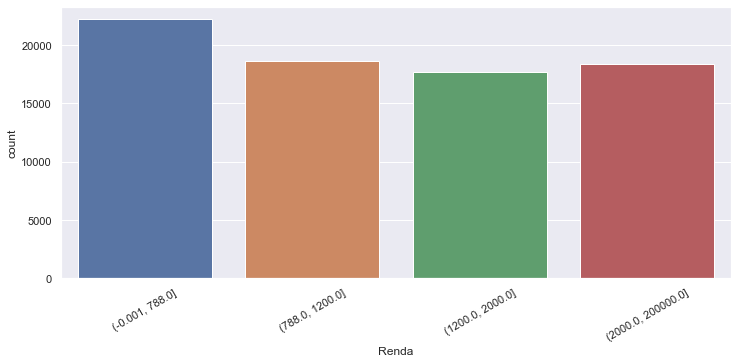

In [380]:
plt.figure(figsize=(12,5))
sns.countplot(x=rendacut)
plt.xticks(rotation=30)
plt.show()

#### 2. Criando a tabela e o gráfico de distribução de frequências

In [146]:
fi = faixa_salarial.value_counts()
fi2 = faixa_salarial_clean.value_counts()
fi, fi2

((-200.0, 11764.706]         75594
 (11764.706, 23529.412]       1022
 (23529.412, 35294.118]        169
 (35294.118, 47058.824]         19
 (47058.824, 58823.529]         16
 (94117.647, 105882.353]         6
 (58823.529, 70588.235]          5
 (70588.235, 82352.941]          4
 (188235.294, 200000.0]          3
 (82352.941, 94117.647]          1
 (117647.059, 129411.765]        1
 (105882.353, 117647.059]        0
 (129411.765, 141176.471]        0
 (141176.471, 152941.176]        0
 (152941.176, 164705.882]        0
 (164705.882, 176470.588]        0
 (176470.588, 188235.294]        0
 Name: Renda, dtype: int64,
 (670.588, 894.118]      12723
 (894.118, 1117.647]      9467
 (1117.647, 1341.176]     7050
 (1341.176, 1564.706]     6379
 (1788.235, 2011.765]     6318
 (-3.8, 223.529]          5668
 (447.059, 670.588]       4027
 (223.529, 447.059]       3998
 (1564.706, 1788.235]     2848
 (2905.882, 3129.412]     2701
 (2458.824, 2682.353]     2177
 (2235.294, 2458.824]     1281
 (335

In [147]:
fp = faixa_salarial.value_counts(True)*100
fp2 = faixa_salarial_clean.value_counts(True)*100
fp, fp2

((-200.0, 11764.706]         98.378449
 (11764.706, 23529.412]       1.330036
 (23529.412, 35294.118]       0.219938
 (35294.118, 47058.824]       0.024727
 (47058.824, 58823.529]       0.020822
 (94117.647, 105882.353]      0.007808
 (58823.529, 70588.235]       0.006507
 (70588.235, 82352.941]       0.005206
 (188235.294, 200000.0]       0.003904
 (82352.941, 94117.647]       0.001301
 (117647.059, 129411.765]     0.001301
 (105882.353, 117647.059]     0.000000
 (129411.765, 141176.471]     0.000000
 (141176.471, 152941.176]     0.000000
 (152941.176, 164705.882]     0.000000
 (164705.882, 176470.588]     0.000000
 (176470.588, 188235.294]     0.000000
 Name: Renda, dtype: float64,
 (670.588, 894.118]      18.648043
 (894.118, 1117.647]     13.875738
 (1117.647, 1341.176]    10.333153
 (1341.176, 1564.706]     9.349671
 (1788.235, 2011.765]     9.260264
 (-3.8, 223.529]          8.307562
 (447.059, 670.588]       5.902355
 (223.529, 447.059]       5.859850
 (1564.706, 1788.235]     4

In [203]:
freq_classes = pd.DataFrame({'Freq_abs': fi,'Freq_percent':fp}).rename_axis('Faixa Salarial')\
                    .sort_values('Faixa Salarial').reset_index()
freq_classes

,Faixa Salarial,Freq_abs,Freq_percent
0,"(-200.0, 11764.706]",75594,98.378449
1,"(11764.706, 23529.412]",1022,1.330036
2,"(23529.412, 35294.118]",169,0.219938
3,"(35294.118, 47058.824]",19,0.024727
4,"(47058.824, 58823.529]",16,0.020822
5,"(58823.529, 70588.235]",5,0.006507
6,"(70588.235, 82352.941]",4,0.005206
7,"(82352.941, 94117.647]",1,0.001301
8,"(94117.647, 105882.353]",6,0.007808
9,"(105882.353, 117647.059]",0,0.000000


In [202]:
freq_classes_clean = pd.DataFrame({'Freq_abs': fi2,'Freq_percent':fp2}).rename_axis('Faixa Salarial')\
                    .sort_values('Faixa Salarial').reset_index()
freq_classes_clean

,Faixa Salarial,Freq_abs,Freq_percent
0,"(-3.8, 223.529]",5668,8.307562
1,"(223.529, 447.059]",3998,5.859850
2,"(447.059, 670.588]",4027,5.902355
3,"(670.588, 894.118]",12723,18.648043
4,"(894.118, 1117.647]",9467,13.875738
5,"(1117.647, 1341.176]",7050,10.333153
6,"(1341.176, 1564.706]",6379,9.349671
7,"(1564.706, 1788.235]",2848,4.174300
8,"(1788.235, 2011.765]",6318,9.260264
9,"(2011.765, 2235.294]",1109,1.625456


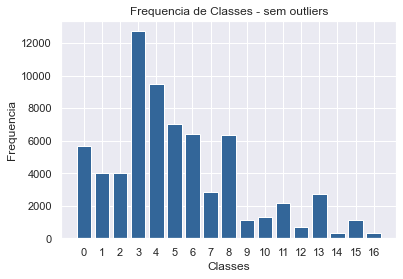

In [204]:
# Organize dataset:
height = freq_classes_clean.Freq_abs
bars = freq_classes_clean.index
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 1))
# Labeling the graphic
plt.xticks(y_pos, bars)
plt.xlabel('Classes')
plt.ylabel('Frequencia')
plt.title('Frequencia de Classes - sem outliers')
# Show graphic
plt.show()

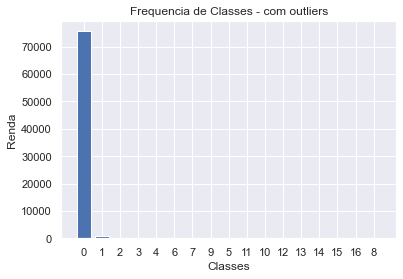

In [196]:
# Organize dataset:
height = freq_classes.Freq_abs
bars = freq_classes.index
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Labeling the graphic
plt.xticks(y_pos, bars)
plt.xlabel('Classes')
plt.ylabel('Renda')
plt.title('Frequencia de Classes - com outliers')
# Show graphic
plt.show()

## 3. Medidas de Tendência Central</font>
***

#### 3.1 Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [205]:
print('Média da Idade:',df.Idade.mean())

44.07142113482561

In [212]:
print('Média da Renda:',df.Renda.mean())
print('Média da Renda(sem outlier):',df.Renda[df['Renda']<=limite_superior].mean())

Média da Renda: 2000.3831988547631
Média da Renda(sem outlier): 1252.5102965101792


In [208]:
print('Média da Altura:',df.Altura.mean())

Média da Altura: 1.6995124540575812


In [209]:
print('Média dos Anos de Estudo:',df['Anos de Estudo'].mean())

Média dos Anos de Estudo: 9.469664237376367


#### 3.2 Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [232]:
print('Média da Idade:',df.Idade.median())

Média da Idade: 43.0


In [233]:
print('Média da Renda:',df.Renda.median())
print('Média da Renda(sem outlier):',df.Renda[df['Renda']<=limite_superior].median())

Média da Renda: 1200.0
Média da Renda(sem outlier): 1050.0


In [234]:
print('Média da Altura:', df.Altura.median())

Média da Altura: 1.6993247325


In [235]:
print('Média dos Anos de Estudo:', df['Anos de Estudo'].median())

Média dos Anos de Estudo: 11.0


#### 3.3. Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

In [236]:
df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [247]:
df.UF.mode()[0]

35

In [248]:
df.Sexo.mode()[0]

0

In [246]:
df.Idade.mode()[0]

40

In [249]:
df.Cor.mode()[0]

8

In [250]:
df['Anos de Estudo'].mode()[0]

12

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

In [287]:
def find_symmetry(df):
    mode = df.mode()
    median = df.median()
    mean = df.mean()
    if((max(mode) < median) and (median < mean)):
        return 'Variável assimétrica à direita'
    elif((min(mode) > median) & (median > mean)):
        return 'Variável assimétrica à esquerda'
    else:
        return 'Variável simétrica'

### Avalie a variável `Renda`

In [263]:
print('Moda:', df.Renda.mode()[0], 'Mediana:', df.Renda.median(),'Média',df.Renda.mean())

Moda: 788 Mediana: 1200.0 Média 2000.3831988547631


In [288]:
find_symmetry(df.Renda)

'Variável assimétrica à direita'

***

### Avalie a variável `Altura`

In [286]:
print('Moda:', min(df.Altura.mode()), 'Mediana:', df.Altura.median(),'Média',df.Altura.mean())
print('Moda:', max(df.Altura.mode()), 'Mediana:', df.Altura.median(),'Média',df.Altura.mean())

Moda: 1.56812756 Mediana: 1.6993247325 Média 1.6995124540575812
Moda: 1.796462296 Mediana: 1.6993247325 Média 1.6995124540575812


In [289]:
find_symmetry(df.Altura)

'Variável simétrica'

***

### Avalie a variável `Anos de estudo`

In [381]:
print('Moda:', min(df['Anos de Estudo'].mode()), 'Mediana:', df['Anos de Estudo'].median(),'Média', df['Anos de Estudo'].mean())
print('Moda:', max(df['Anos de Estudo'].mode()), 'Mediana:', df['Anos de Estudo'].median(),'Média',df['Anos de Estudo'].mean())

Moda: 12 Mediana: 11.0 Média 9.469664237376367
Moda: 12 Mediana: 11.0 Média 9.469664237376367


In [382]:
find_symmetry(df['Anos de Estudo'])

'Variável assimétrica à esquerda'

## 4. Medidas Separatrizes
***

### 4.1 Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

In [292]:
df.Renda.quantile([0.25,0.5,0.75,1])

0.25       788.0
0.50      1200.0
0.75      2000.0
1.00    200000.0
Name: Renda, dtype: float64

In [293]:
df.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [294]:
df.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [401]:
renda_percent = df.Renda.quantile([i/100 for i in range(1,100)])
renda_percent[:0.18].sum()

5640.0

### 4.2 Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

In [297]:
q1, q3 = df.Renda.quantile(0.25), df.Renda.quantile(0.75)
iqr =  q3 - q1 
limite_superior = min(q3 + 1.5 * iqr, df.Renda.max())
limite_superior

3818.0

<AxesSubplot:ylabel='Renda'>

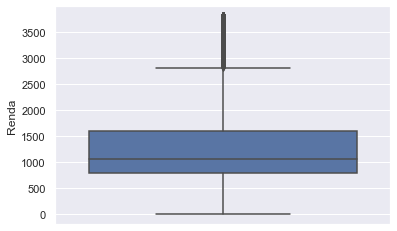

In [298]:
sns.boxplot(y=df.Renda[df['Renda']<=limite_superior])

<AxesSubplot:ylabel='Altura'>

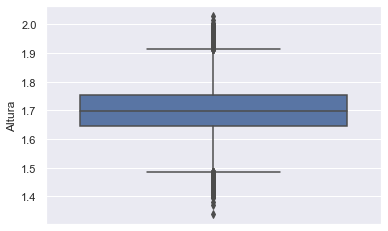

In [299]:
sns.boxplot(y=df.Altura)

# <font color=green>5. Medidas de Dispersão</font>
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.

In [322]:
print('Idade\nVariância:', df.Idade.var(),'Desvio padrão:',df.Idade.std())
print('Renda\nVariância:', df.Renda.var(),'Desvio padrão:',df.Renda.std())
print('Altura\nVariância:', df.Altura.var(),'Desvio padrão:',df.Altura.std())

Idade
Variância: 155.76496363582208 Desvio padrão: 12.480583465360187
Renda
Variância: 11044906.00622118 Desvio padrão: 3323.3877303470294
Altura
Variância: 0.006354868656686821 Desvio padrão: 0.07971743006825309


<AxesSubplot:xlabel='UF', ylabel='Idade'>

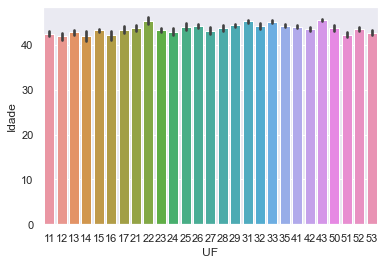

In [323]:
sns.barplot(data=df,y='Idade', x='UF')

<AxesSubplot:xlabel='UF', ylabel='Renda'>

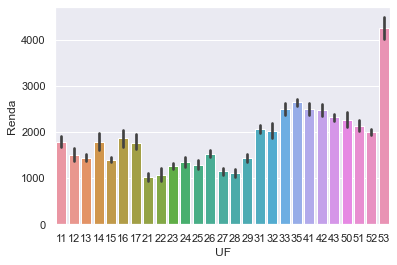

In [319]:
sns.barplot(data=df,y='Renda', x='UF')

<AxesSubplot:xlabel='UF', ylabel='Altura'>

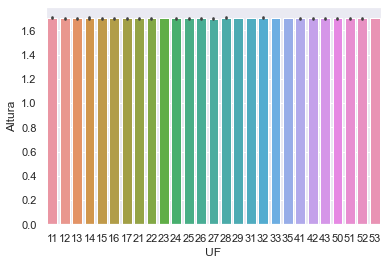

In [315]:
sns.barplot(data=df,y='Altura', x='UF')